In [1]:
from datetime import datetime, timedelta
from pandas import DataFrame
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from networkx.readwrite import json_graph
import os
from random import randint
import sys
from typing import Tuple

/var/folders/3n/7kvkbqjd0l9grdj7kptkcfgr0000gn/T/ipykernel_11054/2474978882.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  from pandas import DataFrame


In [2]:
sys.path.append("../")
tests_dir = os.path.abspath("../tests")
sys.path.append(tests_dir)

In [3]:
from traffic_simulator.city_map import CityMap
from traffic_simulator.model import TimeDeltaDiff
from traffic_simulator.traffic_analysis import TrafficAnalyzer
from traffic_simulator.traffic_simulation import Simulator
from conftest import generate_static_city_map, generate_static_trips

##### Generate City Map

In [4]:
r2_city_map = generate_static_city_map()
r2_city_map

In [5]:
CityMap.get_city_map_statistics(r2_city_map)

node degree and node clustering
0 2 0
1 2 0
4 3 0
3 2 0
2 1 0

the adjacency list
0 1 4
1 3
4 2 3
3
2


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7}


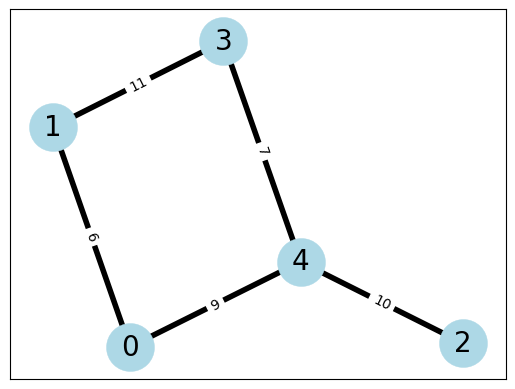

In [6]:
CityMap.visualize_city_map(r2_city_map)

# Generate Static Trips

In [7]:
r2_trips = generate_static_trips()
len(r2_trips)

20

In [8]:
r2_trips

{Trip(source=0, destination=2, numer_of_trips=1): Trip(source=0, destination=2, numer_of_trips=1),
 Trip(source=2, destination=0, numer_of_trips=1): Trip(source=2, destination=0, numer_of_trips=1),
 Trip(source=0, destination=3, numer_of_trips=1): Trip(source=0, destination=3, numer_of_trips=1),
 Trip(source=3, destination=0, numer_of_trips=1): Trip(source=3, destination=0, numer_of_trips=1),
 Trip(source=1, destination=2, numer_of_trips=1): Trip(source=1, destination=2, numer_of_trips=1),
 Trip(source=2, destination=1, numer_of_trips=2): Trip(source=2, destination=1, numer_of_trips=2),
 Trip(source=1, destination=4, numer_of_trips=1): Trip(source=1, destination=4, numer_of_trips=1),
 Trip(source=4, destination=1, numer_of_trips=2): Trip(source=4, destination=1, numer_of_trips=2),
 Trip(source=2, destination=3, numer_of_trips=3): Trip(source=2, destination=3, numer_of_trips=3),
 Trip(source=3, destination=2, numer_of_trips=1): Trip(source=3, destination=2, numer_of_trips=1),
 Trip(sour

# R2

#### The benefit values of constructing the following new roads:
#### (0,2), (0,3), (1,2), (1,4), (2,3)
#### Use a k value (budget) of 2, which two of the above roads would you recommend for construction? Remember that once the first road is 
#### constructed, benefits that you initially computed for the other 4 will now change and these will need to be recomputed.

##### Generate Benefit Matrix k = 0 # Initial Benefit Matrix

In [9]:
def get_max_benefit_road_segment(max_benefit_matrix: DataFrame) -> Tuple[int, int]:
    max_benefit = max_benefit_matrix.iloc[0].values
    source = int(max_benefit[0])
    destination = int(max_benefit[1])
    
    return source, destination

In [10]:
r2_benefit_matrix, n1, n2, n1_n2_truth_table_data = TrafficAnalyzer.get_road_recommendations(r2_city_map, r2_trips,debug=True)

In [11]:
r2_benefit_matrix

,source,destination,benefit
3,2,3,38.6
4,0,2,38.0
2,1,4,36.0
0,1,2,30.0
1,0,3,12.8


In [12]:
 n1

{4}

In [13]:
n2

{1, 4}

In [15]:
n1_n2_truth_table_data

,x,y,nx_indirect_benefits,ny_indirect_benefits,nx_neighbor,ny_neighbor,indirect_x,indirect_y,has_edge_indirect_x_y,has_edge_nx_neighbor_indirect_y,has_edge_indirect_x_x,has_edge_ny_neighbor_indirect_y
0,1,2,4,-1,4,1,T,F,F,F,None,None
1,1,2,4,-1,1,4,F,F,F,F,None,None
2,1,2,{},"{(0, 2), (2, 0)}",-1,0,0,2,F,F,T,F
3,1,2,{},"{(0, 2), (2, 0)}",-1,0,2,0,F,F,F,F
4,1,2,{},"{(2, 3), (0, 2), (2, 0), (3, 2)}",-1,3,2,3,F,F,F,F
5,1,2,{},"{(2, 3), (0, 2), (2, 0), (3, 2)}",-1,3,0,2,F,F,T,F
6,1,2,{},"{(2, 3), (0, 2), (2, 0), (3, 2)}",-1,3,2,0,F,F,F,F
7,1,2,{},"{(2, 3), (0, 2), (2, 0), (3, 2)}",-1,3,3,2,F,F,T,F
8,1,2,-1,-1,-1,-1,F,F,F,F,None,None
9,0,3,-1,-1,-1,-1,F,F,F,F,None,None


In [16]:
n1_n2_truth_table_data.to_csv("n1_n2_truth_table_data.csv")

In [15]:
r2_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r2_city_map, r2_trips)
r2_benefit_matrix

,source,destination,benefit
3,2,3,38.6
4,0,2,38.0
2,1,4,36.0
0,1,2,30.0
1,0,3,12.8


In [238]:
##### k = 1 # Recommended road to build first is the road segment (2,3)
r2_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r2_benefit_matrix)
r2_max_benefit_matrix

,source,destination,benefit
3,2,3,38.6


In [239]:
source, destination = get_max_benefit_road_segment(r2_max_benefit_matrix)
print(f"({source}, {destination})")

(2, 3)


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7, (3, 2): 10.2}


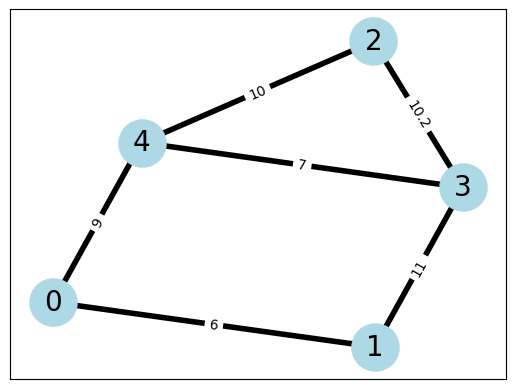

In [240]:
CityMap.add_road_segment(r2_city_map, source, destination)
CityMap.visualize_city_map(r2_city_map)

In [241]:
r2_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r2_city_map, r2_trips)
r2_benefit_matrix

,source,destination,benefit
1,0,2,26.6
0,1,2,26.0
3,1,4,24.6
2,0,3,12.8


In [242]:
##### k = 2 # Next recommended road to be built is the road segment (0,2)
max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r2_benefit_matrix)
max_benefit_matrix

,source,destination,benefit
1,0,2,26.6


In [243]:
source, destination = get_max_benefit_road_segment(r2_max_benefit_matrix)
print(f"({source}, {destination})")

(2, 3)


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7, (3, 2): 6.119999999999999}


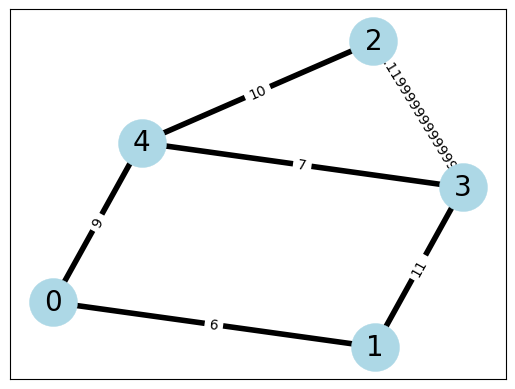

In [244]:
CityMap.add_road_segment(r2_city_map, source, destination)
CityMap.visualize_city_map(r2_city_map)